Importing Necessary Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

Loading Dataset

In [2]:

from sklearn.datasets import load_breast_cancer

# Load Dataset
data = load_breast_cancer(as_frame=True)
df = data.frame


In [3]:
print(df)


     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [4]:
# Basic Preprocessing
df.dropna(inplace=True)  # Handle missing values if any
X = df.drop(columns=['target'])
y = df['target']

load_breast_cancer: Loads a built-in breast cancer dataset for training.

df: Contains the data, which is then cleaned by dropping any missing values (dropna()).

X: Features (input variables).

y: Target variable (labels indicating if a tumor is benign or malignant)

In [5]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif

# Load Data
X = pd.read_csv('features.csv')
y = pd.read_csv('labels.csv').values.ravel()


Missing Values Handling: dropna() ensures no missing values are present in the dataset.

Feature and Label Split: X contains the features, and y contains the labels for classification.

C:\Users\regmi\AppData\Local\Temp\ipykernel_3624\1962769296.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='Set2')


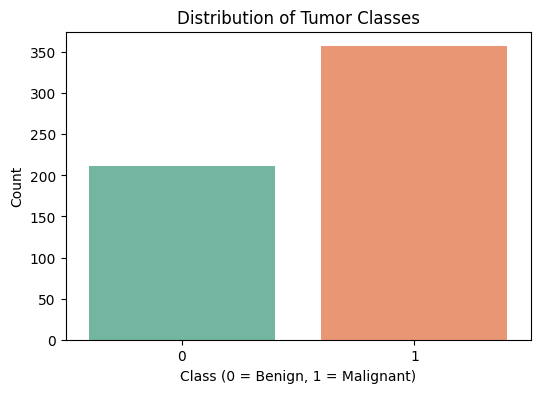

In [6]:


# Visualize the distribution of classes (Benign vs. Malignant)
plt.figure(figsize=(6, 4))
sns.countplot(x=y, palette='Set2')
plt.title("Distribution of Tumor Classes")
plt.xlabel("Class (0 = Benign, 1 = Malignant)")
plt.ylabel("Count")
plt.show()


In [7]:
# Apply SelectKBest
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X, y)

SelectKBest: Selects the top 10 features most relevant to predicting the target variable.

Feature Importance: Visualizes the importance of selected features based on statistical significance (F-Score).

Saving Selected Features: The transformed features are saved to a CSV file for later use

In [8]:

# Get selected feature names
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features.tolist())

# Save selected features
pd.DataFrame(X_selected, columns=selected_features).to_csv('selected_features.csv', index=False)

Selected Features: ['mean radius', 'mean perimeter', 'mean area', 'mean concavity', 'mean concave points', 'worst radius', 'worst perimeter', 'worst area', 'worst concavity', 'worst concave points']


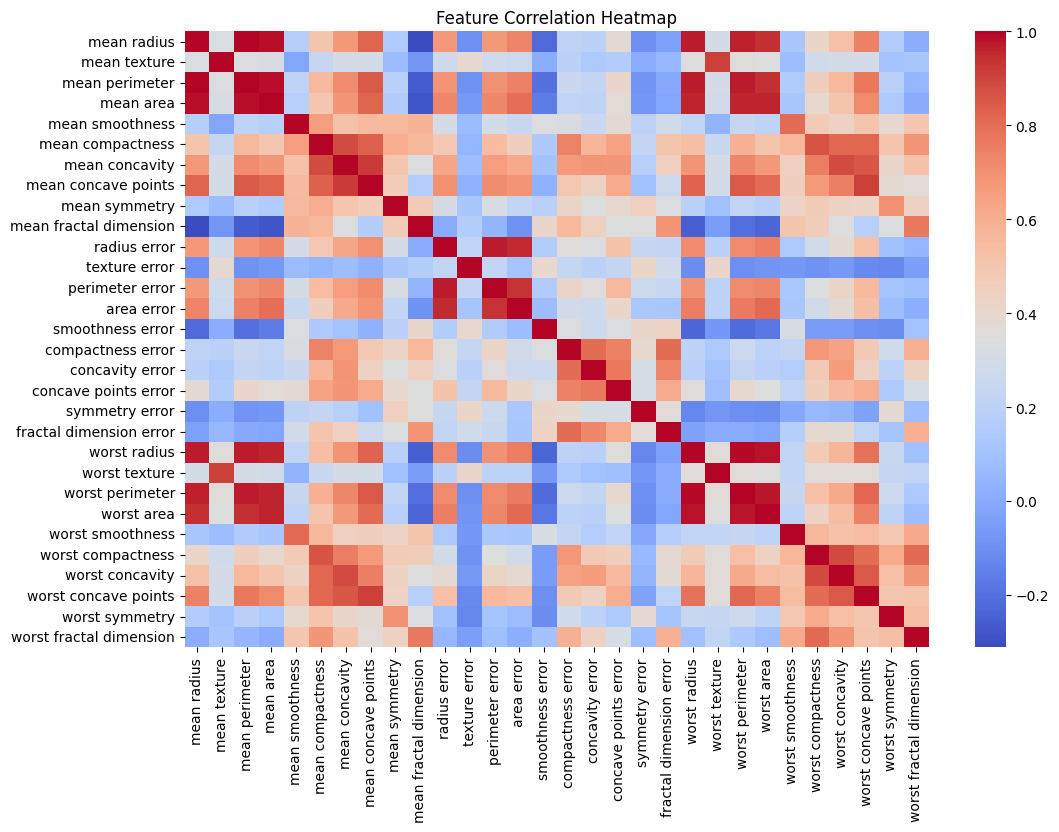

In [9]:
# Compute the correlation matrix
corr_matrix = X.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, cbar=True)
plt.title("Feature Correlation Heatmap")
plt.show()

C:\Users\regmi\AppData\Local\Temp\ipykernel_3624\781844269.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=selected_features, y=feature_scores[selector.get_support()], palette='viridis')


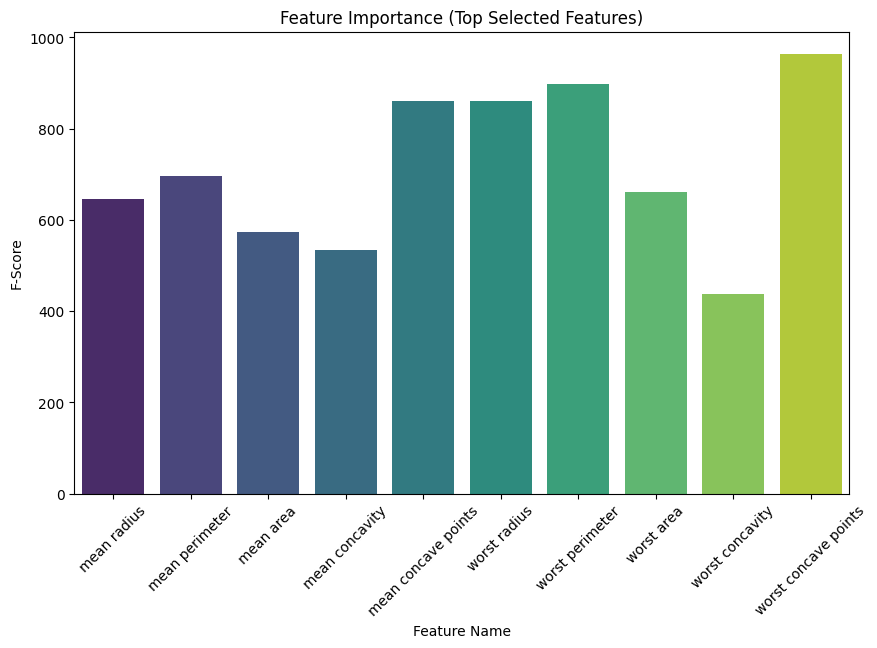

In [10]:
# Plot the scores of selected features
feature_scores = selector.scores_
selected_features = X.columns[selector.get_support()]

plt.figure(figsize=(10, 6))
sns.barplot(x=selected_features, y=feature_scores[selector.get_support()], palette='viridis')
plt.title("Feature Importance (Top Selected Features)")
plt.xlabel("Feature Name")
plt.ylabel("F-Score")
plt.xticks(rotation=45)
plt.show()


In [11]:

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define Model
model = MLPClassifier(max_iter=1000, random_state=42)


Train-Test Split: Divides the dataset into training and testing sets (80% training, 20% testing).

MLPClassifier: A neural network classifier is chosen for training.

Hyperparameter Grid: Defines different configurations (e.g., number of hidden layers, activation functions) to try during hyperparameter tuning.

GridSearchCV: Performs cross-validation and grid search to find the best model settings.


In [ ]:
# Define Hyperparameter Grid
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01]
}

# Grid Search CV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

c:\Users\regmi\OneDrive\Desktop\Term 3\Neural Network- Ishant\Breast Cancer\breast_cancer\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:697: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [ ]:
# Best Parameters and Model Evaluation
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

Best Parameters: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (50,), 'solver': 'adam'}
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        43
           1       0.95      1.00      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



In [1]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plot the confusion matrix
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, display_labels=["Benign", "Malignant"], cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

NameError: name 'best_model' is not defined